# SEP measures exploratory analysis

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt

In [2]:
ind = pd.read_csv("data/clean/indicators.csv")
ind_cont = ind.drop(['exp_cat2', 'inc_cat2', 'assets_cat2'], axis=1).copy()

### Univariate analysis of the components of expenditure and income

In [3]:
ind_cont_long = ind_cont.melt(id_vars='household', var_name='var', value_name='val')

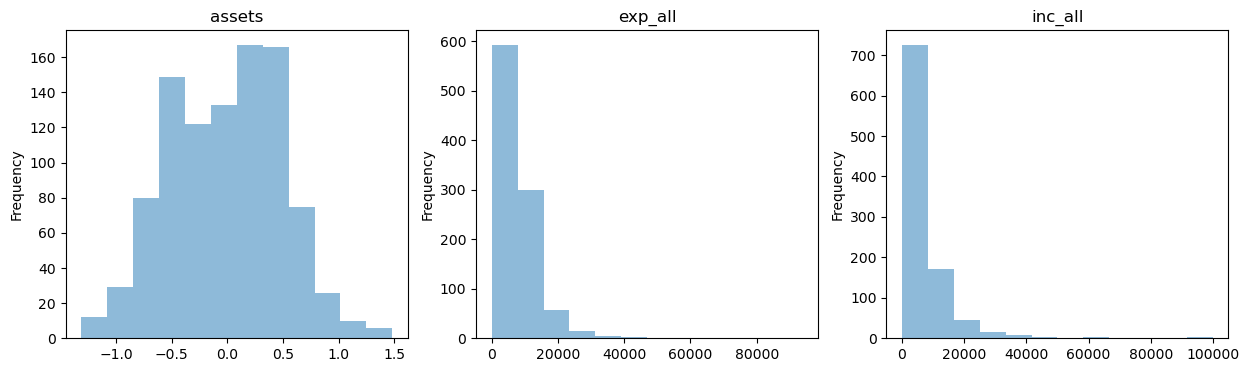

In [4]:
# Continuous variables - outcomes
ax = ind_cont_long.loc[ind_cont_long['var'].isin(['exp_all', 'inc_all', 'assets']),['var', 'val']].plot.hist(by='var', bins=12, alpha=0.5,
                                              layout = (1,3), figsize = (15,4), legend = False)

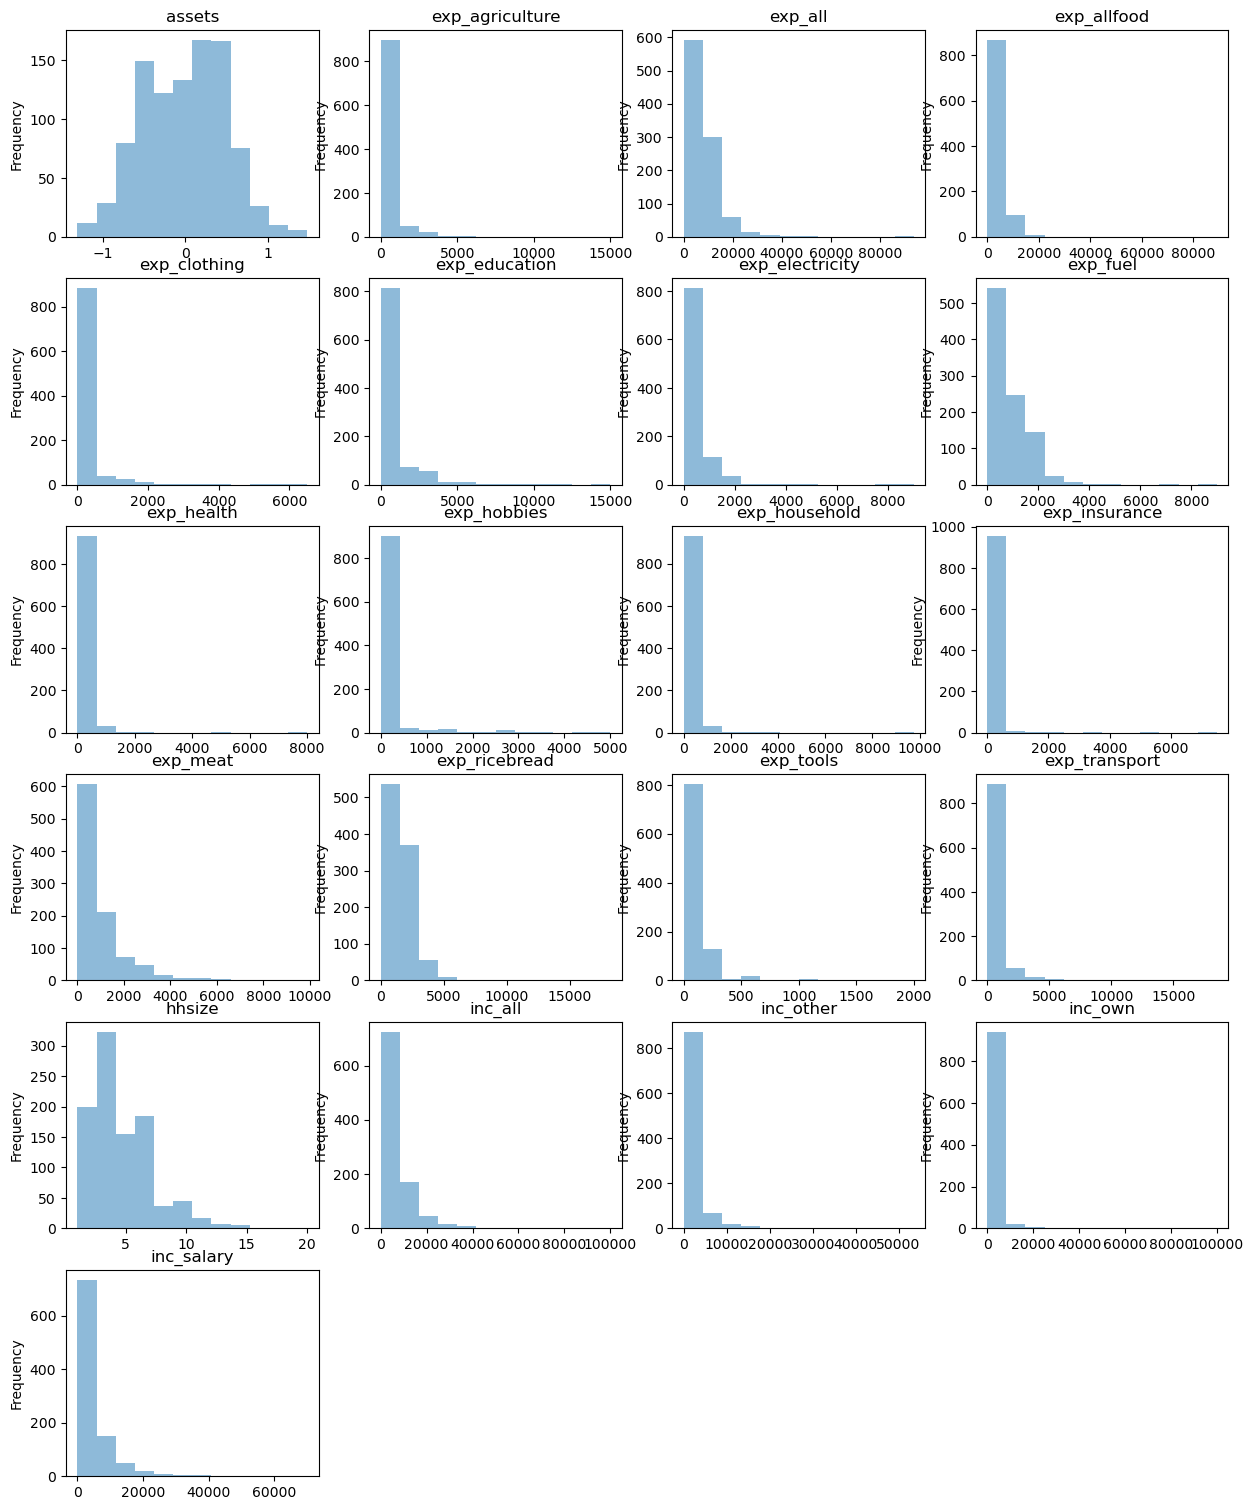

In [5]:
# Continuous variables - all 
ax = ind_cont_long.loc[:,['var', 'val']].plot.hist(by='var', bins=12, alpha=0.5,
                                                   layout = (7,4), figsize = (15,22), legend = False)

### Pair plot

/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


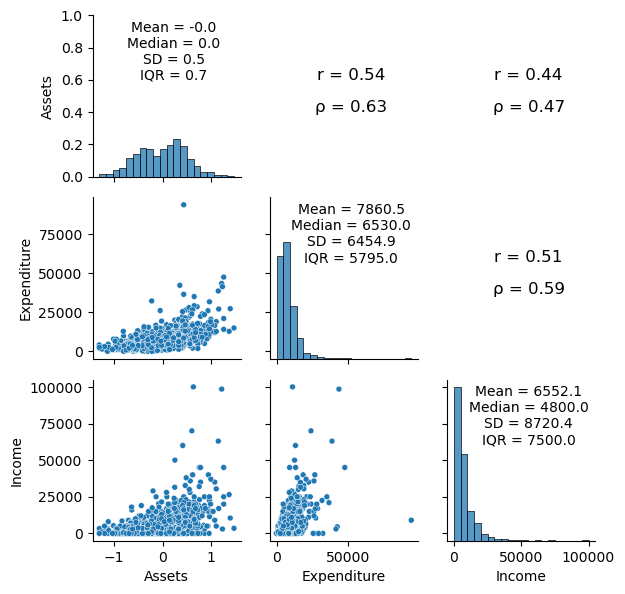

In [6]:
ind_pairs = ind[['assets', 'exp_all', 'inc_all']]
ind_pairs = ind_pairs.rename(columns={"assets": "Assets", "exp_all":"Expenditure", "inc_all":"Income"})

def corrcoef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p1 = pearsonr(x,y)
    p,p2 = spearmanr(x,y)

    ax.annotate('r = {:.2f}'.format(r), xy=(0.55,0.6), xycoords='axes fraction', ha='center', fontsize=12)
    ax.annotate('ρ = {:.2f}'.format(p), xy=(0.55,0.4), xycoords='axes fraction', ha='center', fontsize=12)
    ax.set_axis_off()

def meanSD(x,label=None,color=None,**kwargs):
    ax = plt.gca()
    mean_plot = np.mean(x)
    med_plot = np.median(x)
    sd_plot = np.std(x)
    iqr_plot = np.subtract(*np.percentile(x, [75, 25]))
    
    ax.annotate('Mean = {:.1f}'.format(mean_plot), xy=(0.55,0.9), xycoords='axes fraction', ha='center', fontsize=10)
    ax.annotate('Median = {:.1f}'.format(med_plot), xy=(0.55,0.8), xycoords='axes fraction', ha='center', fontsize=10)
    ax.annotate('SD = {:.1f}'.format(sd_plot), xy=(0.55,0.7), xycoords='axes fraction', ha='center', fontsize=10)
    ax.annotate('IQR = {:.1f}'.format(iqr_plot), xy=(0.55,0.6), xycoords='axes fraction', ha='center', fontsize=10)
    ax.set_axis_off()
    
g = sns.PairGrid(ind_pairs, height=2)
g.map_diag(sns.histplot, bins=20)
g.map_diag(meanSD)
g.map_lower(sns.scatterplot, size=1)
g.map_upper(corrcoef)
plt.show()

In [10]:
# Write to disk
g.savefig('figures/exploratory_outcomes.png', dpi=300)

## Overlap train/test

In [22]:
ind_overlap = ind[['household', 'assets', 'exp_all', 'inc_all']]
ind_overlap.columns = ['household', 'Assets', 'Expenditure', 'Income']
split = pd.read_csv("data/clean/datasplit.csv")
ind_overlap = pd.merge(ind_overlap, split, on = 'household')
ind_overlap = pd.melt(ind_overlap, id_vars = ['household', 'split'], var_name='Measure')
ind_overlap = ind_overlap.rename(columns={"split": "Set"})

/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/cmila/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

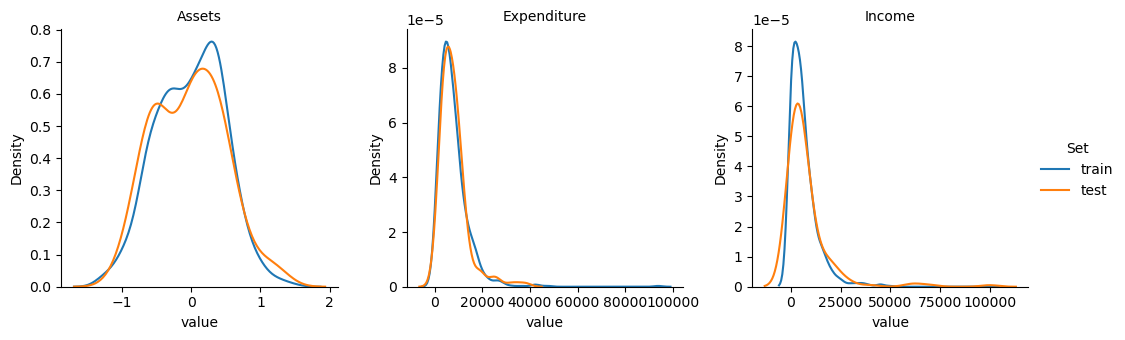

In [34]:
g = sns.FacetGrid(ind_overlap, col='Measure', hue="Set", height=3.5, aspect=1, sharex=False, sharey=False)
g.map(sns.kdeplot, "value", label='small', bw_adjust=1 )
g.set_titles(col_template = '{col_name}')
g.add_legend()
# plt.tight_layout()

In [35]:
# Write to disk
g.savefig('figures/outcome_overlap.png', dpi=300)